#***Propensify*** (project name)
(Propensity Model to identify how likely certain target groups customers
respond to the marketing campaign)

#Problem Statement:
Are you aware of what, when, and why your customers will make a purchase? Many businesses
undertake an intense pursuit to discover these answers, dedicating valuable resources to datadriven campaigns and high-cost strategies - yet the actual outcomes often remain elusive and
disappointing.
Customer information is considered to be a valuable asset, however its true worth can only be
established when it is used. Many companies have large collections of data that appear to be
impressive, but upon further examination, they may contain outdated or unimportant
information.
Propensity modeling is a method that aims to forecast the chance that individuals, leads, and
customers will engage in specific actions. This method uses statistical analysis which takes into
account all the independent and confounding factors that impact customer behavior.
Suppose you are working for a company as a Data Scientist. Your company is commissioned by
an insurance company to develop a tool to optimize their marketing efforts.
This project is aimed at building a propensity model to identify potential customers.

In [1]:
#import all necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pickle
#warnings
import warnings
warnings.filterwarnings('ignore')

#Load the Dataset:-
About Data:-\
The insurance company has provided you with a historical data set (train.csv). The company has
also provided you with a list of potential customers to whom to market (test.csv). From this list
of potential customers, you need to determine yes/no whether you wish to market to them.
(Note: Ignore any additional columns available other than the listed below in the table)

In [2]:
#load the both train and test file
train=pd.read_excel('/content/train.xlsx')
test=pd.read_excel('/content/test.xlsx')

In [3]:
#check the dataset all column
pd.set_option('display.max_columns', None)

In [4]:
# Inspect datasets
train.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,profit,id
0,34.0,admin.,single,university.degree,no,no,yes,cellular,apr,wed,2.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,999.0,0.0,no,NaN,1.0
1,31.0,services,single,high.school,no,no,no,cellular,jul,thu,35.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,999.0,0.0,no,NaN,2.0
2,NaN,admin.,single,high.school,no,no,no,telephone,jun,NaN,1.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,999.0,0.0,no,NaN,3.0
3,52.0,admin.,divorced,university.degree,unknown,yes,no,cellular,jul,tue,2.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0.0,no,NaN,4.0
4,39.0,blue-collar,single,NaN,unknown,yes,no,cellular,jul,tue,6.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,999.0,0.0,no,NaN,5.0


In [5]:
#check the shape of dataset
train.shape

(8240, 24)

In [6]:
test.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,id
0,NaN,admin.,married,NaN,no,no,yes,cellular,sep,wed,2,999,1,failure,-1.1,94.199,-37.5,0.886,4963.6,999.0,2,1
1,35.0,services,married,high.school,no,no,no,cellular,sep,tue,2,3,1,success,-3.4,92.379,-29.8,0.788,5017.5,0.1,2,2
2,50.0,blue-collar,married,professional.course,unknown,yes,no,cellular,may,thu,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,999.0,2,3
3,30.0,admin.,single,university.degree,no,no,no,cellular,aug,wed,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,999.0,0,4
4,39.0,services,divorced,high.school,no,yes,no,cellular,nov,tue,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,999.0,0,5


In [7]:
#check shape of test dataset
test.shape

(32950, 22)

#Exploratory Data Analysis(EDA):-
Analyze and understand the data to identify patterns,
relationships, and trends in the data by using Descriptive Statistics and Visualizations.

In [8]:
# Exploratory Data Analysis (EDA)
def perform_eda(data):
    print("\nSummary statistics:")
    print(data.describe())
    print("\nMissing values:")
    print(data.isnull().sum())
    print("\n duplicated:-")
    print(data.duplicated().sum())
    print("\ndata information:-")
    print(data.info())

perform_eda(train)


Summary statistics:
           custAge     campaign        pdays     previous  emp.var.rate  \
count  6224.000000  8238.000000  8238.000000  8238.000000   8238.000000   
mean     39.953728     2.531682   960.916606     0.183054      0.056397   
std      10.540516     2.709773   190.695054     0.514209      1.566550   
min      18.000000     1.000000     0.000000     0.000000     -3.400000   
25%      32.000000     1.000000   999.000000     0.000000     -1.800000   
50%      38.000000     2.000000   999.000000     0.000000      1.100000   
75%      47.000000     3.000000   999.000000     0.000000      1.400000   
max      94.000000    40.000000   999.000000     6.000000      1.400000   

       cons.price.idx  cons.conf.idx    euribor3m  nr.employed      pmonths  \
count     8238.000000    8238.000000  8238.000000  8238.000000  8238.000000   
mean        93.570977     -40.577907     3.586929  5165.575965   960.687436   
std          0.578782       4.650101     1.742784    72.727423   1

In [9]:
#dataset known well
perform_eda(test)


Summary statistics:
            custAge      campaign         pdays     previous  emp.var.rate  \
count  24908.000000  32950.000000  32950.000000  32950.00000  32950.000000   
mean      40.035852      2.576571    962.865190      0.17044      0.088258   
std       10.425448      2.784839    185.953677      0.48993      1.572019   
min       17.000000      1.000000      0.000000      0.00000     -3.400000   
25%       32.000000      1.000000    999.000000      0.00000     -1.800000   
50%       38.000000      2.000000    999.000000      0.00000      1.100000   
75%       47.000000      3.000000    999.000000      0.00000      1.400000   
max       98.000000     56.000000    999.000000      7.00000      1.400000   

       cons.price.idx  cons.conf.idx     euribor3m   nr.employed  \
count    32950.000000   32950.000000  32950.000000  32950.000000   
mean        93.576836     -40.483772      3.629882   5167.400920   
std          0.578857       4.622585      1.732277     72.128548   
min 

In [10]:
train['profit'].isnull().sum()

7310

#Data Cleaning:-

In [11]:
#drop the row in id column missing values
train.dropna(subset=['id'], inplace=True)

In [12]:
#clean the missing values in datet both just creating function on both numerical nad categorical columns
def clean_data(data):
    # Identify numeric and categorical columns
    numeric_cols = data.select_dtypes(include=['number']).columns
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns

    # Fill missing values
    data[numeric_cols] = data[numeric_cols].apply(lambda x: x.fillna(x.median()), axis=0)
    data[categorical_cols] = data[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]), axis=0)

    # Convert date columns to datetime if applicable
    if 'date' in data.columns:
        data['date'] = pd.to_datetime(data['date'], errors='coerce')

    return data

In [13]:
train = clean_data(train)
test= clean_data(test)

In [14]:
#check the null value in both train nad test
print("is there any null values in train dataset:-",train.isnull().sum().any())
print("is there any null values in test dataset:-",test.isnull().sum().any())

is there any null values in train dataset:- False
is there any null values in test dataset:- False


In [15]:
# Compare data types between train and test datasets
train_dtypes = train.dtypes
test_dtypes = test.dtypes

# Display differences in data types
for col in train_dtypes.index:
    if col in test_dtypes and train_dtypes[col] != test_dtypes[col]:
        print(f"Column '{col}': Train dtype = {train_dtypes[col]}, Test dtype = {test_dtypes[col]}")

# Convert columns in train or test datasets
for col in train_dtypes.index:
    if col in test_dtypes and train_dtypes[col] != test_dtypes[col]:
        # Convert test column to train column dtype
        test[col] = test[col].astype(train_dtypes[col])
        print(f"Converted column '{col}' in test dataset to dtype: {train_dtypes[col]}")

# Verify alignment
print("\nAligned Data Types:")
print("Train dataset dtypes:")
print(train.dtypes)
print("\nTest dataset dtypes:")
print(test.dtypes)

Column 'campaign': Train dtype = float64, Test dtype = int64
Column 'pdays': Train dtype = float64, Test dtype = int64
Column 'previous': Train dtype = float64, Test dtype = int64
Column 'pastEmail': Train dtype = float64, Test dtype = int64
Column 'id': Train dtype = float64, Test dtype = int64
Converted column 'campaign' in test dataset to dtype: float64
Converted column 'pdays' in test dataset to dtype: float64
Converted column 'previous' in test dataset to dtype: float64
Converted column 'pastEmail' in test dataset to dtype: float64
Converted column 'id' in test dataset to dtype: float64

Aligned Data Types:
Train dataset dtypes:
custAge           float64
profession         object
marital            object
schooling          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign          float64
pdays             float64
previous          float64
poutcome           o

#Feature selection:-

In [16]:
#num column list and correlation
num_cols = train.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = train[num_cols].corr()

In [17]:
corr_matrix

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,profit,id
custAge,1.000000,-0.002504,-0.038940,0.039188,-0.001534,0.012932,0.121709,0.004366,-0.029136,-0.038924,0.026058,0.053613,0.007309
campaign,-0.002504,1.000000,0.043170,-0.067156,0.144846,0.131177,-0.022511,0.126954,0.137529,0.043156,-0.050854,-0.016860,-0.040301
pdays,-0.038940,0.043170,1.000000,-0.591426,0.272676,0.071599,-0.088312,0.300028,0.381316,0.999992,-0.503876,-0.079483,-0.189173
previous,0.039188,-0.067156,-0.591426,1.000000,-0.412068,-0.180294,-0.076815,-0.450641,-0.504011,-0.591439,0.799061,0.056913,0.127639
emp.var.rate,-0.001534,0.144846,0.272676,-0.412068,1.000000,0.766178,0.234569,0.971495,0.901478,0.272602,-0.332596,-0.067437,-0.169001
cons.price.idx,0.012932,0.131177,0.071599,-0.180294,0.766178,1.000000,0.087312,0.675538,0.498278,0.071356,-0.157092,-0.040141,-0.068667
cons.conf.idx,0.121709,-0.022511,-0.088312,-0.076815,0.234569,0.087312,1.000000,0.312890,0.134930,-0.088209,-0.054076,0.023124,0.011338
euribor3m,0.004366,0.126954,0.300028,-0.450641,0.971495,0.675538,0.312890,1.000000,0.942894,0.300052,-0.357731,-0.067533,-0.174173
nr.employed,-0.029136,0.137529,0.381316,-0.504011,0.901478,0.498278,0.134930,0.942894,1.000000,0.381430,-0.394005,-0.080371,-0.199313
pmonths,-0.038924,0.043156,0.999992,-0.591439,0.272602,0.071356,-0.088209,0.300052,0.381430,1.000000,-0.503813,-0.079458,-0.189188


In [18]:
#eliminate column that not related to target features using correlation
train.drop(['pastEmail','pmonths','previous','pdays'], axis=1, inplace=True)
test.drop(['pastEmail','pmonths','previous','pdays'], axis=1, inplace=True)

In [19]:
#drop id column in each train and test dataset
train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

In [20]:
train['responded'].value_counts()

,count
responded,
no,7310
yes,928


*Check the categories of all categorical column for the number of categories in it*

In [21]:
#check the whole dataset categorical columns value count
for col in train.select_dtypes(include=['object', 'category']).columns:
    print(f"Value counts for column '{col}':")
    print(train[col].value_counts())
    print("\n")

Value counts for column 'profession':
profession
admin.           2102
blue-collar      1847
technician       1351
services          792
management        583
retired           337
entrepreneur      314
self-employed     279
housemaid         213
unemployed        190
student           159
unknown            71
Name: count, dtype: int64


Value counts for column 'marital':
marital
married     4957
single      2339
divorced     932
unknown       10
Name: count, dtype: int64


Value counts for column 'schooling':
schooling
university.degree      4137
high.school            1340
basic.9y                863
professional.course     738
basic.4y                586
basic.6y                313
unknown                 260
illiterate                1
Name: count, dtype: int64


Value counts for column 'default':
default
no         6619
unknown    1618
yes           1
Name: count, dtype: int64


Value counts for column 'housing':
housing
yes        4300
no         3754
unknown     184
Name: count

***Analyze the Relationship:***

Confirm if profit is completely determined by responded. For example:
If responded is "no," profit is always empty.\
If responded is "yes," profit has a value.\
The original profit column should still be removed from the training dataset since it's directly correlated with the target.

*The categorical column has single category that is uselesss for model training*

In [22]:
#drop the profit column
train.drop('profit', axis=1, inplace=True)

In [23]:
#check the shape of dataset the train and test dataset
print("shape of train dataset:-",train.shape)
print("shape of test dataset:-",test.shape)

shape of train dataset:- (8238, 18)
shape of test dataset:- (32950, 17)


#Remove Outlier:-

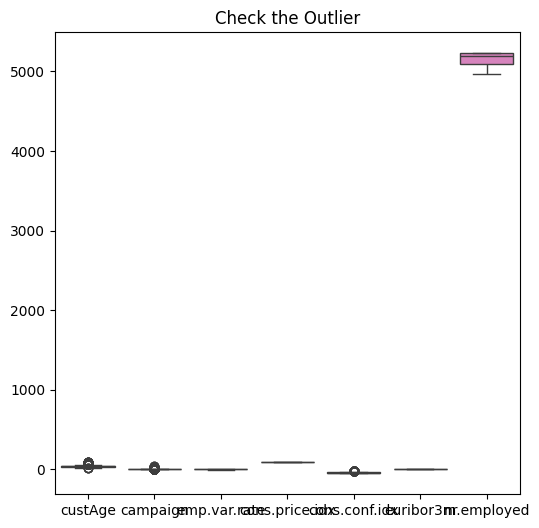

In [24]:
#check the outlier in train using boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(data=train)
plt.title("Check the Outlier")
plt.show()

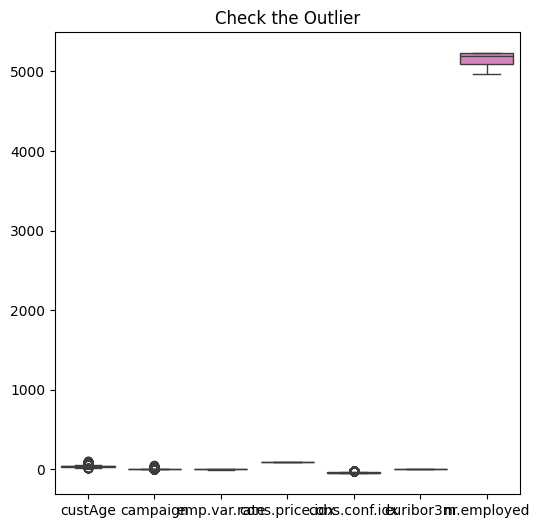

In [25]:
#check the outlier in test using boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(data=test)
plt.title("Check the Outlier")
plt.show()

In [26]:
# Check for outliers (using IQR)
def remove_outliers(df, col_list):
    for col in col_list:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [27]:
#remove the outier in train dataset
num_cols = train.select_dtypes(include=['float64', 'int64']).columns
train = remove_outliers(train, num_cols)

In [28]:
#Remove outlier in test dataset
num_cols = test.select_dtypes(include=['float64', 'int64']).columns
test= remove_outliers(test, num_cols)

#Data Analysis:-

In [29]:
#all categorical column list
categorical_columns = train.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['profession', 'marital', 'schooling', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome', 'responded'],
      dtype='object')

In [30]:
#all numerical column list
numerical_columns = train.select_dtypes(include=['number']).columns
numerical_columns

Index(['custAge', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

***Univariate Analysis:-***

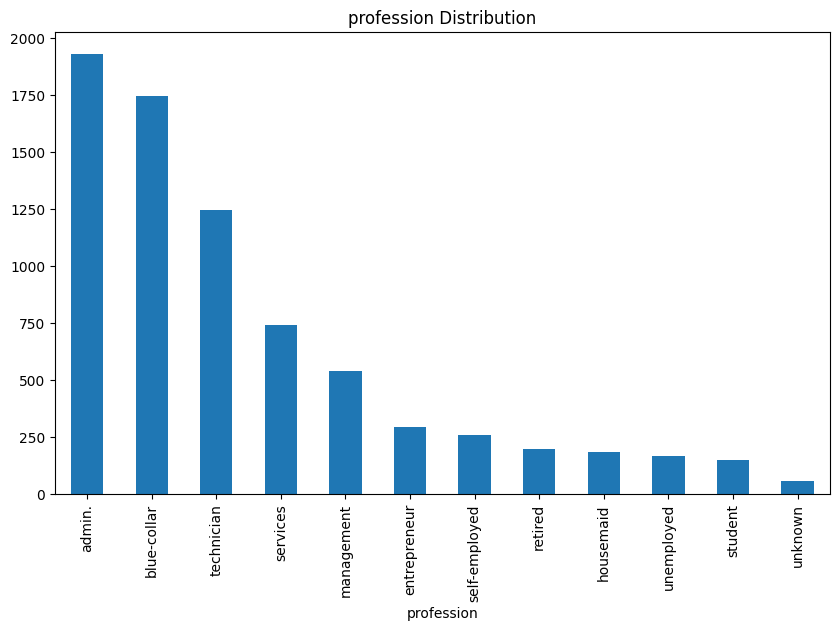

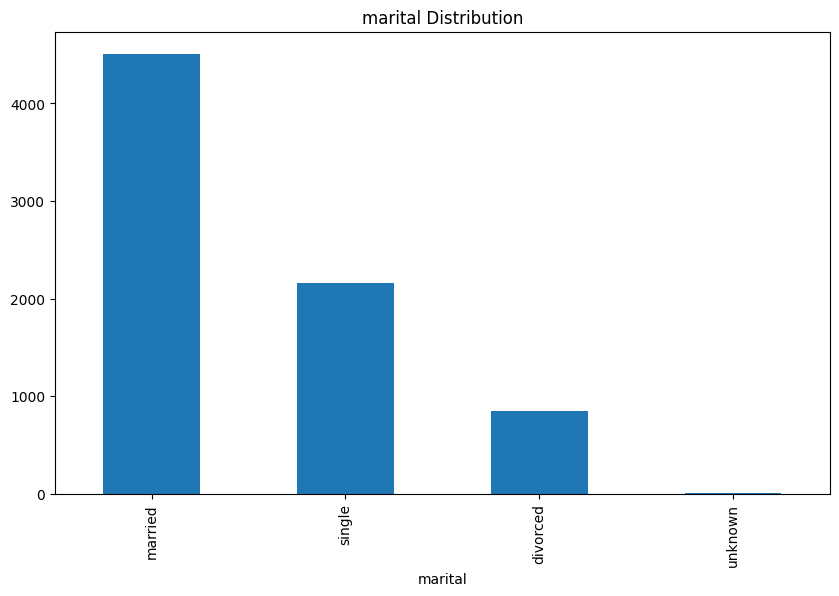

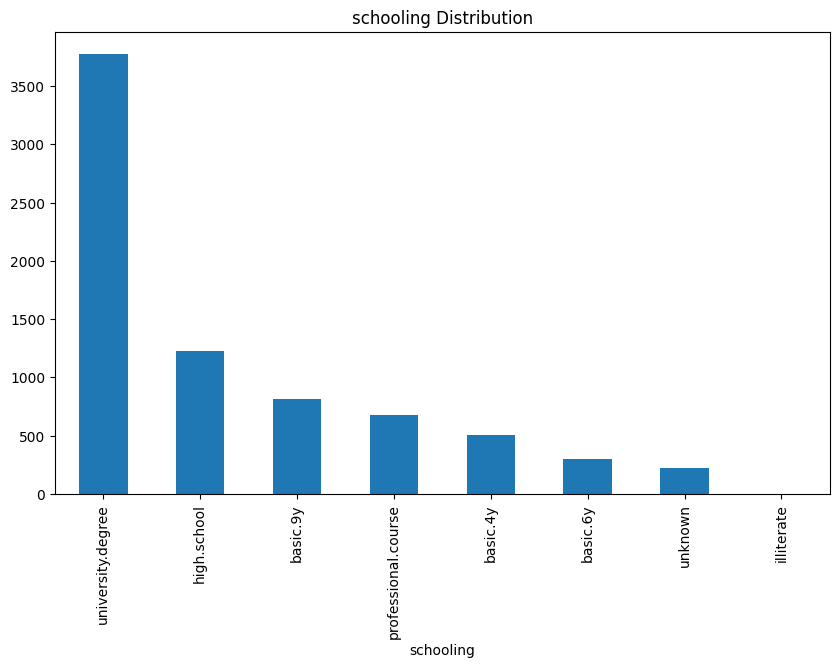

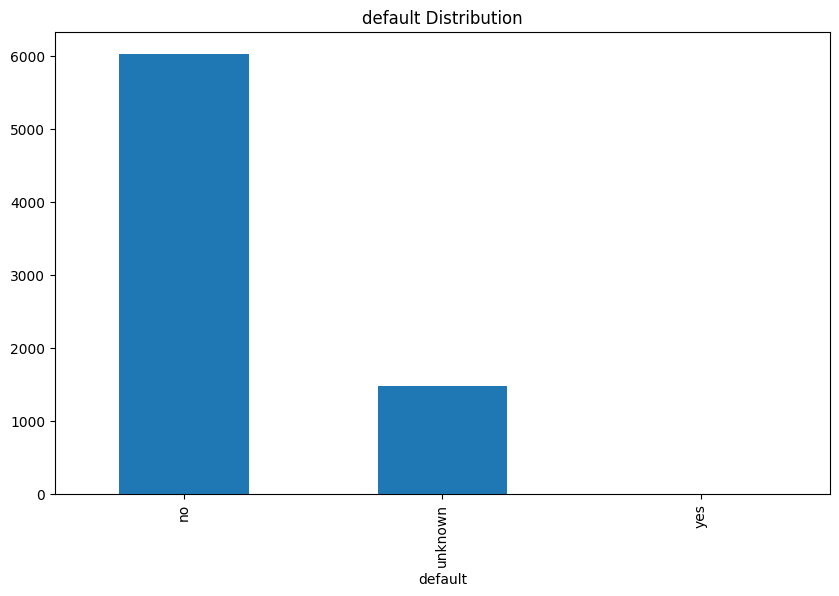

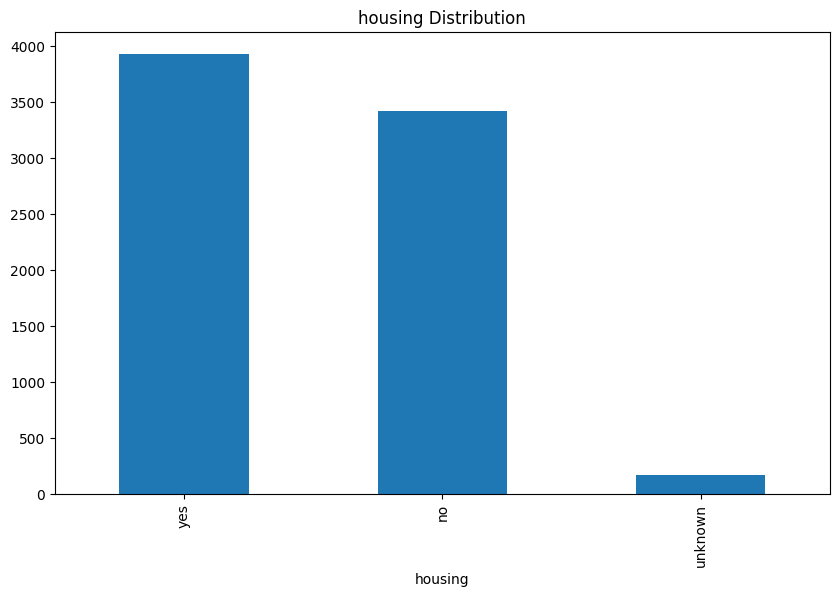

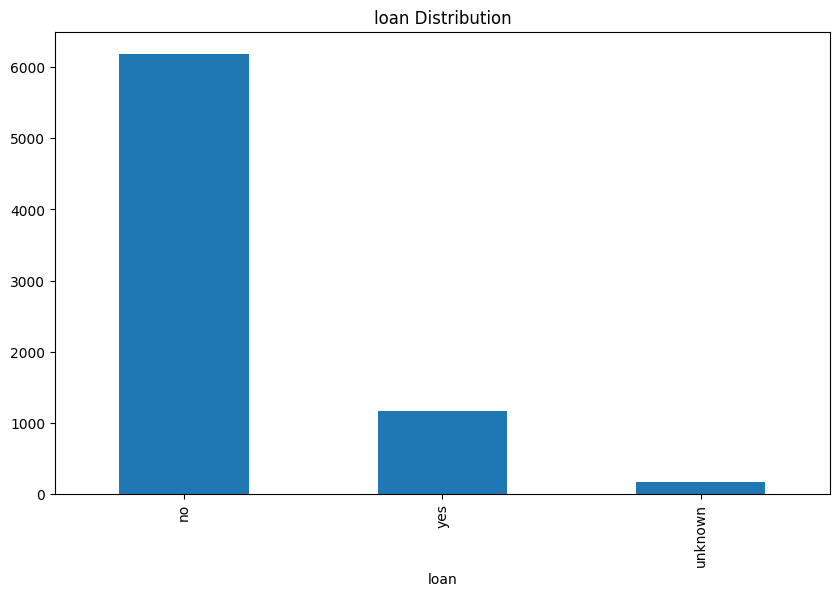

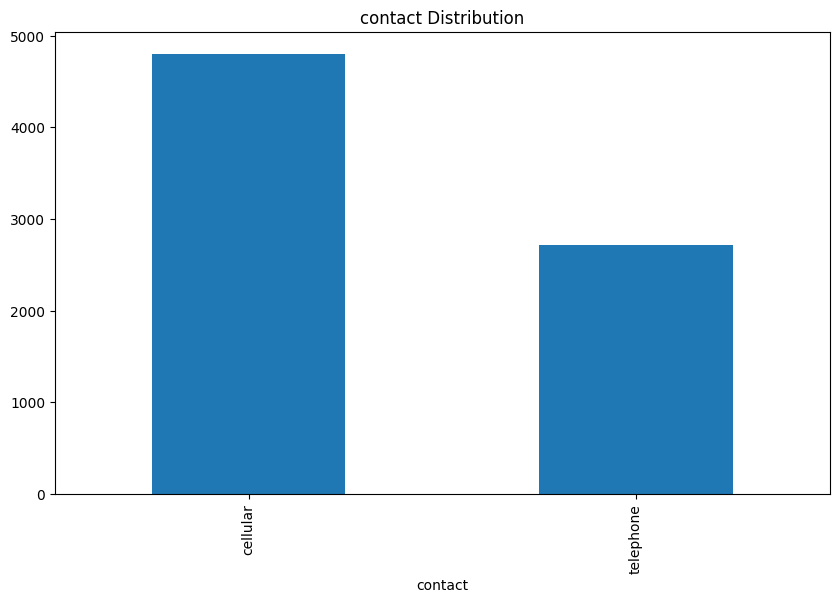

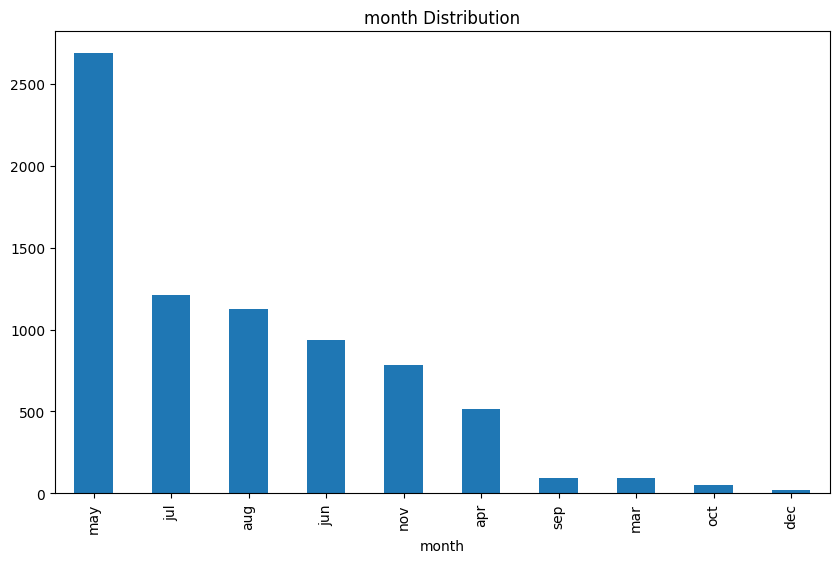

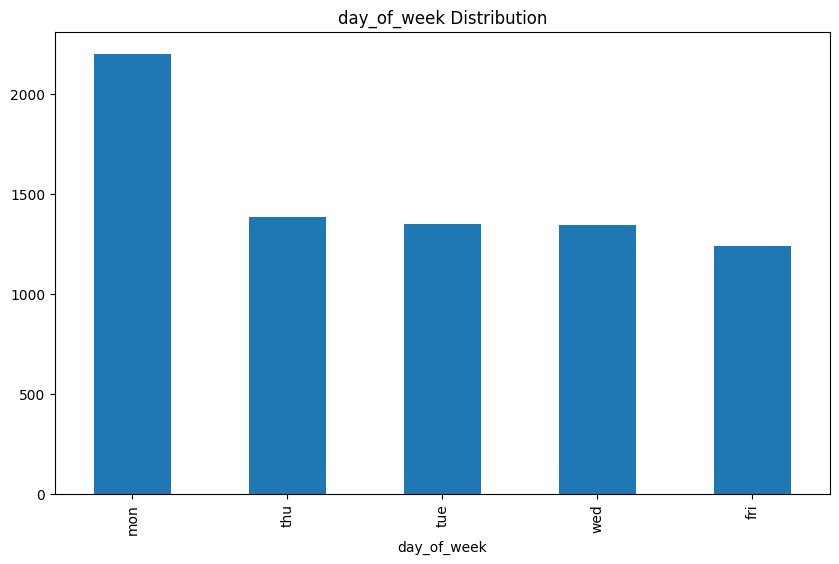

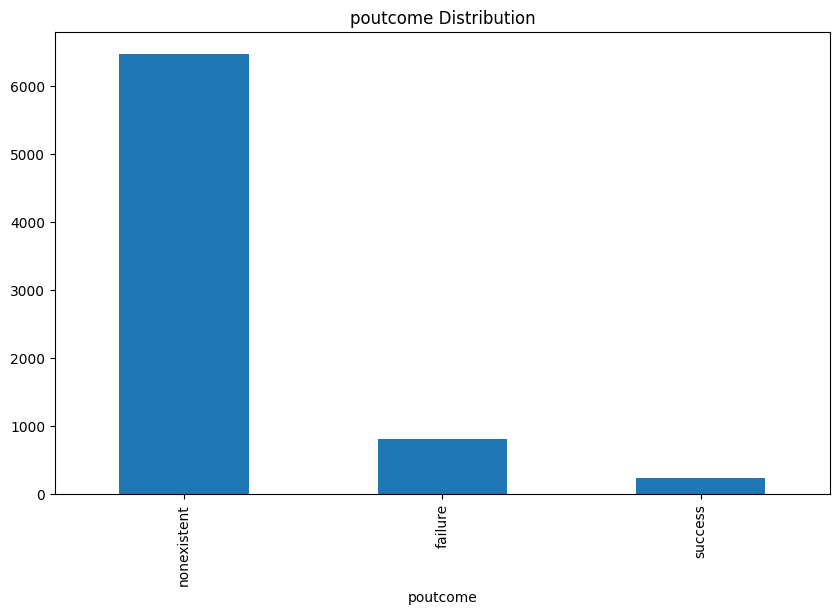

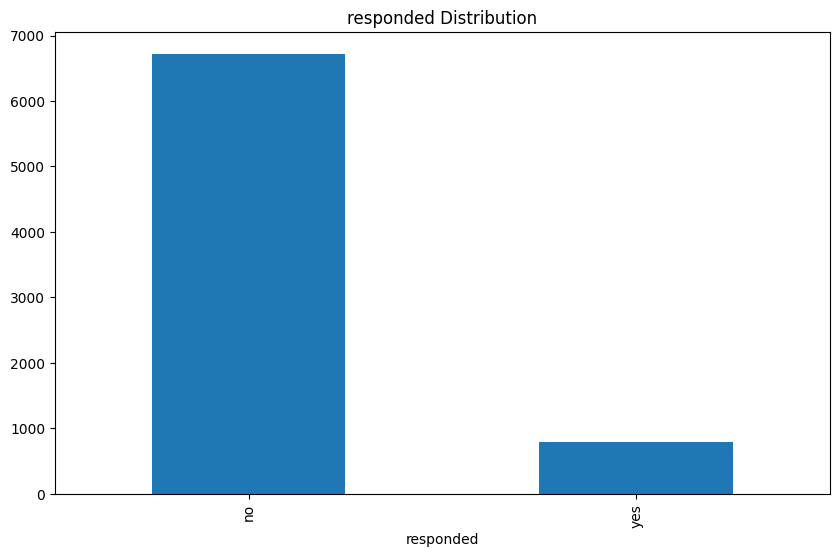

In [31]:
#peform the categorical list bar chart
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    train[column].value_counts().plot(kind='bar')
    plt.title(f"{column} Distribution")

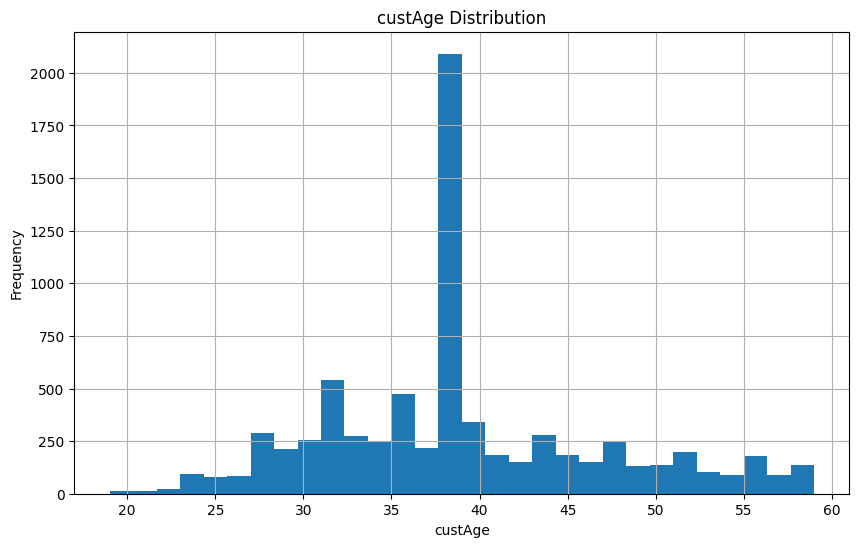

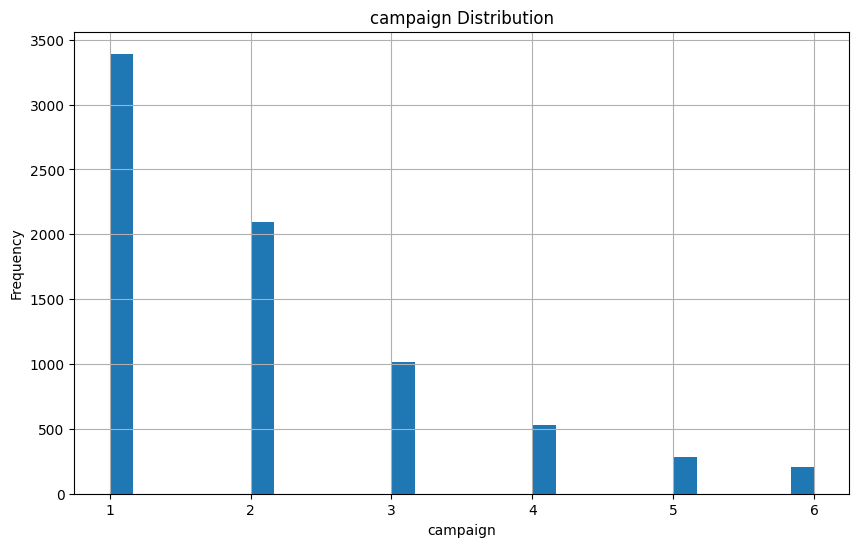

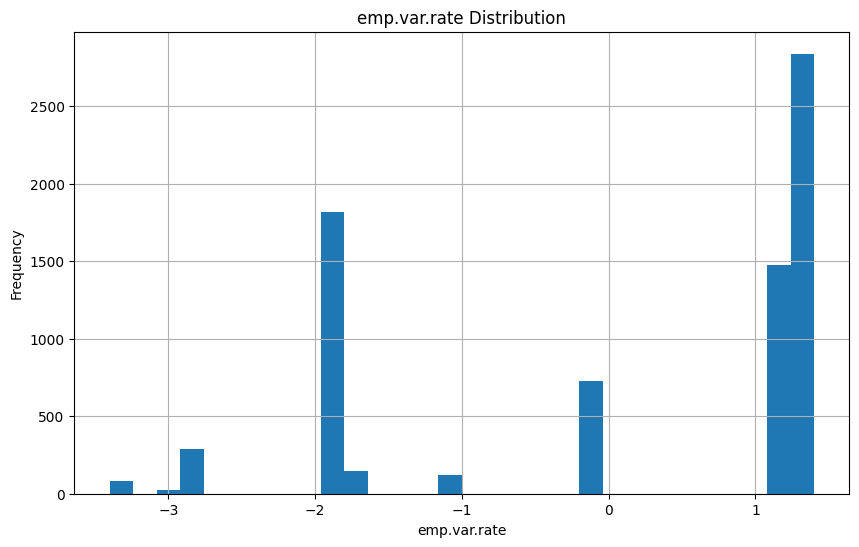

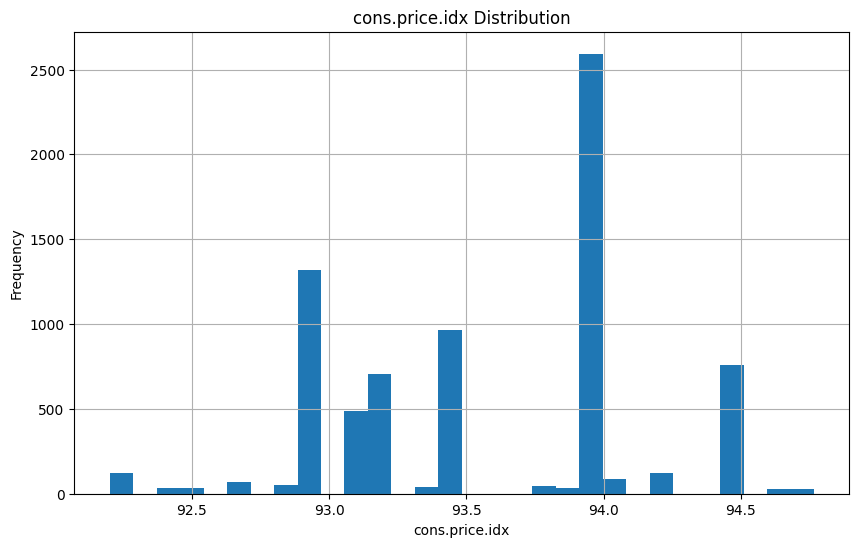

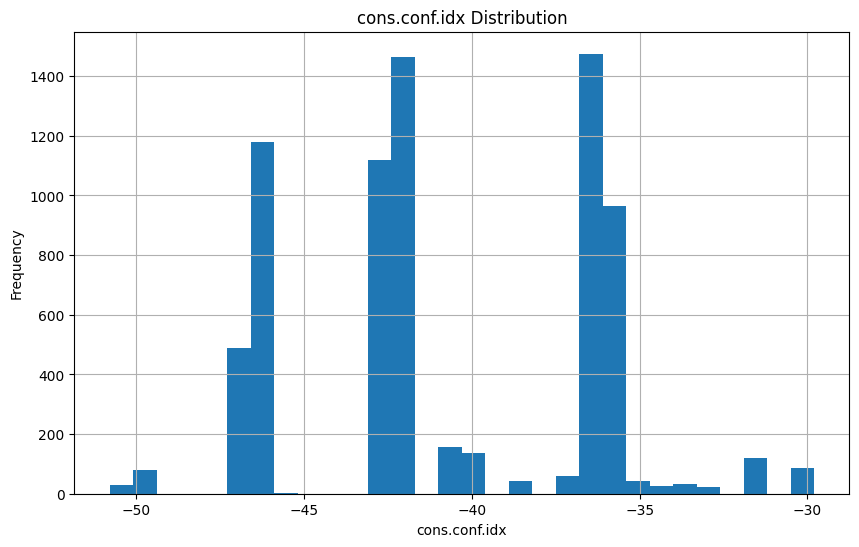

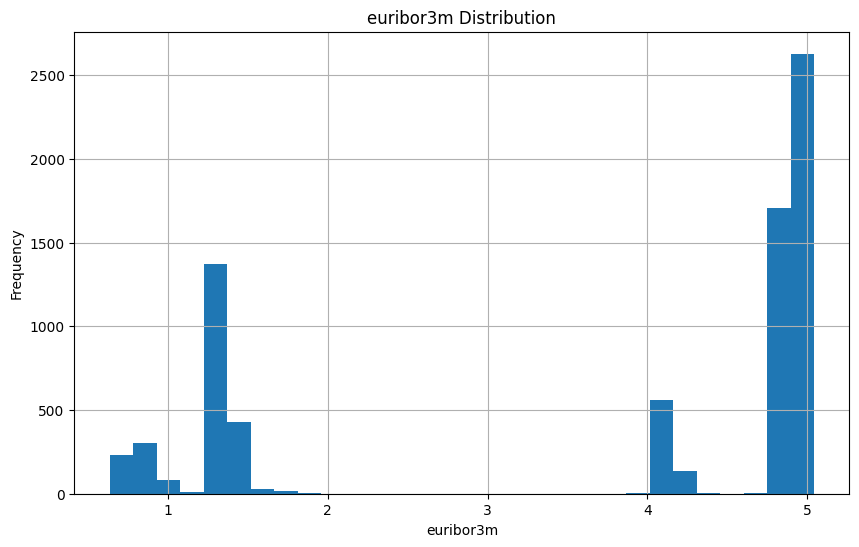

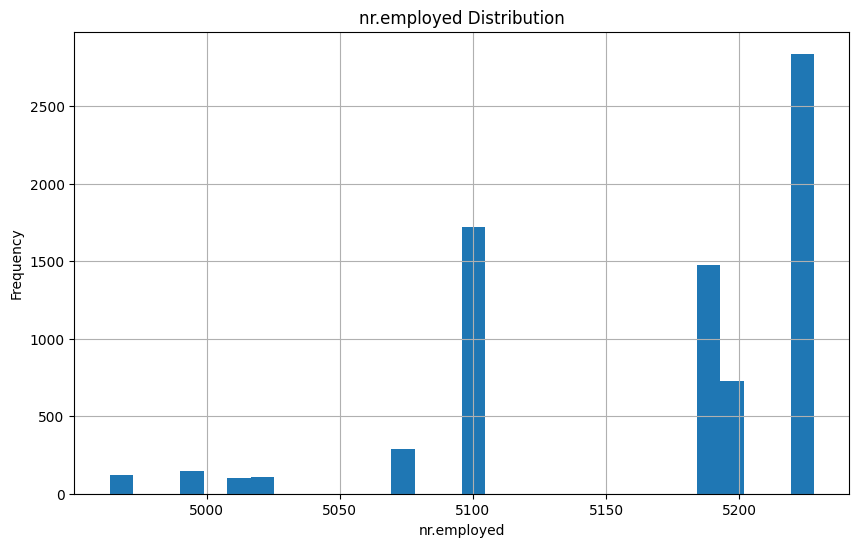

In [32]:
#numerical column distribution plot in all numerical columns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    train[column].hist(bins=30)
    plt.title(f"{column} Distribution")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

***Bivariate Analysis***

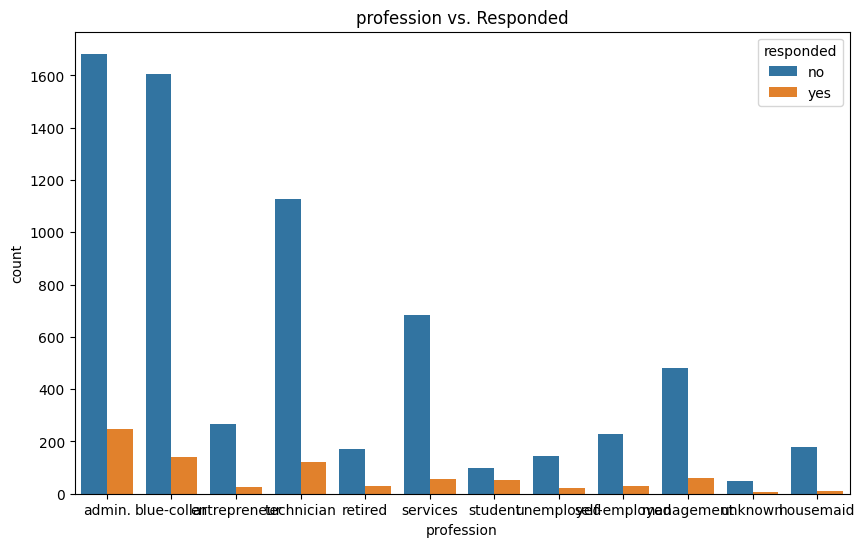

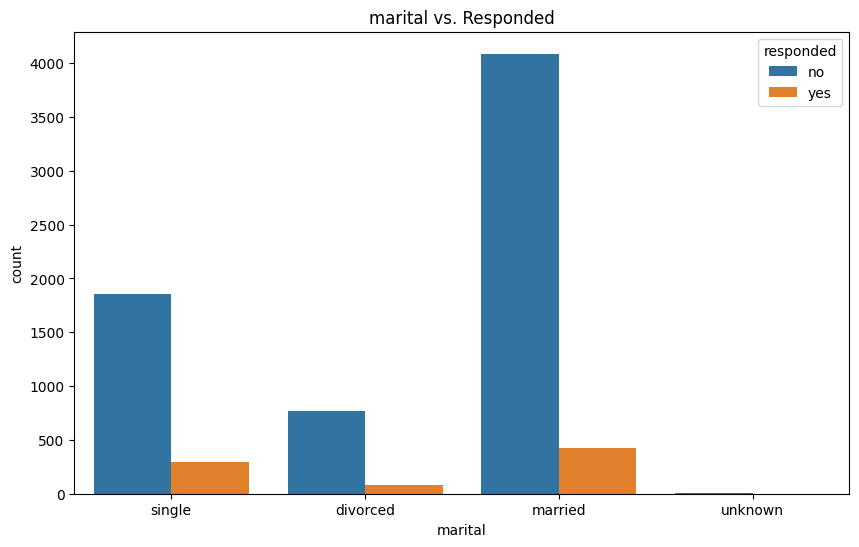

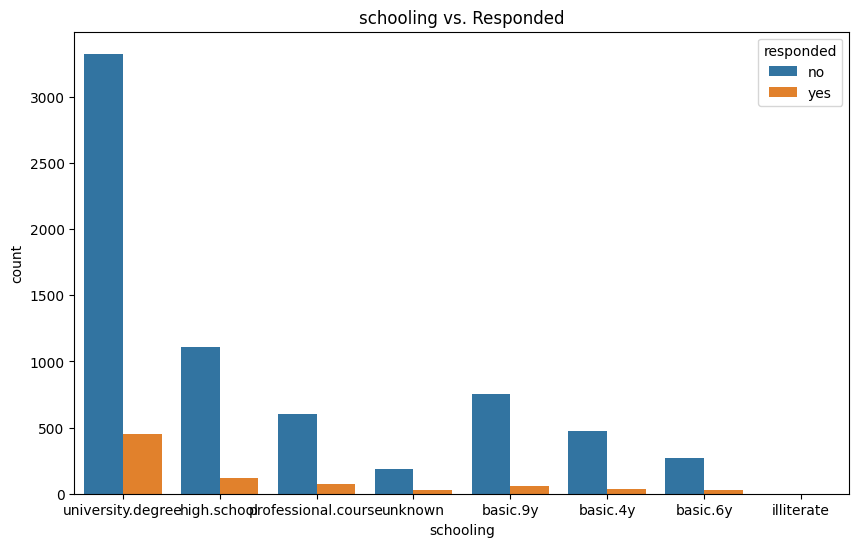

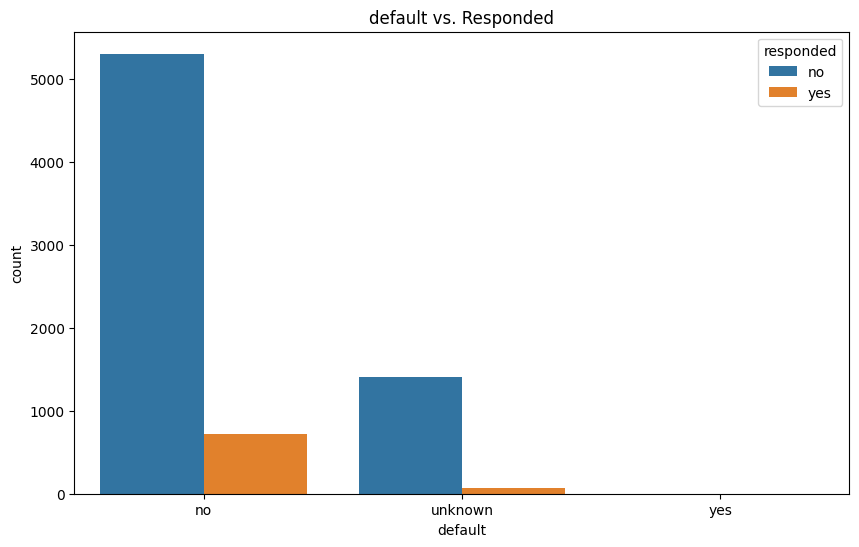

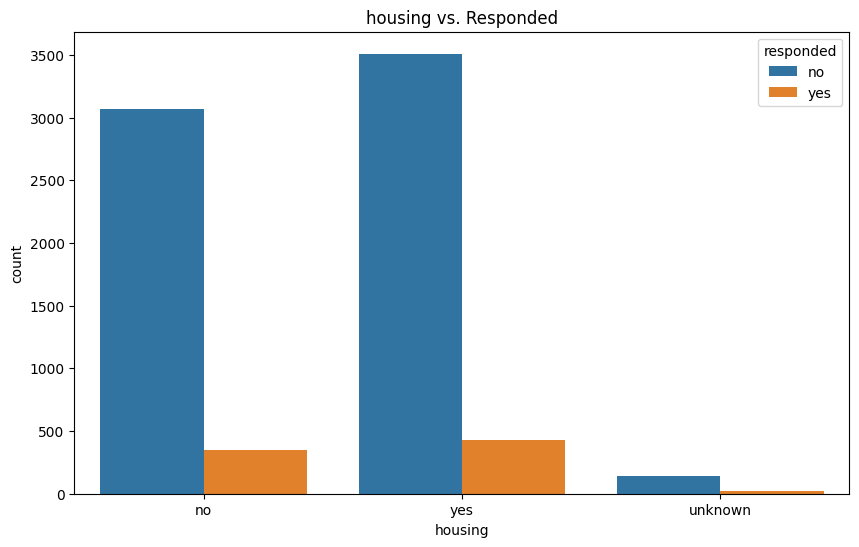

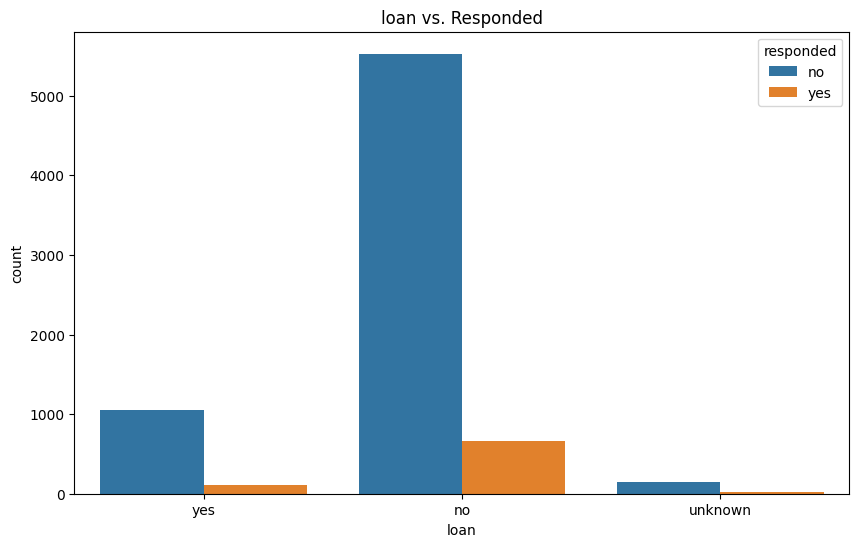

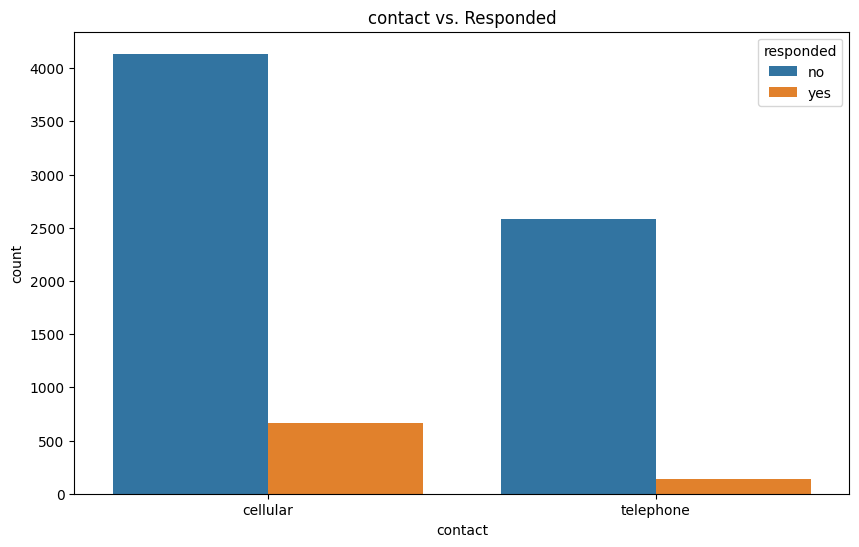

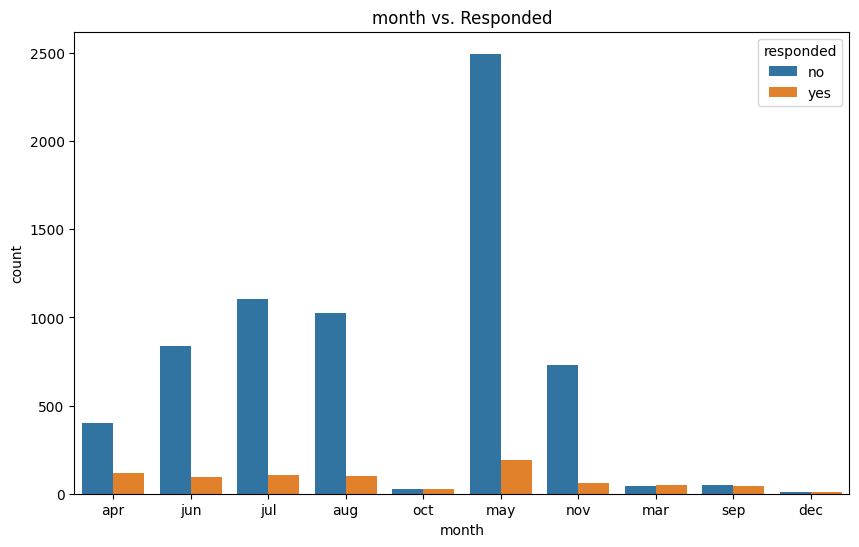

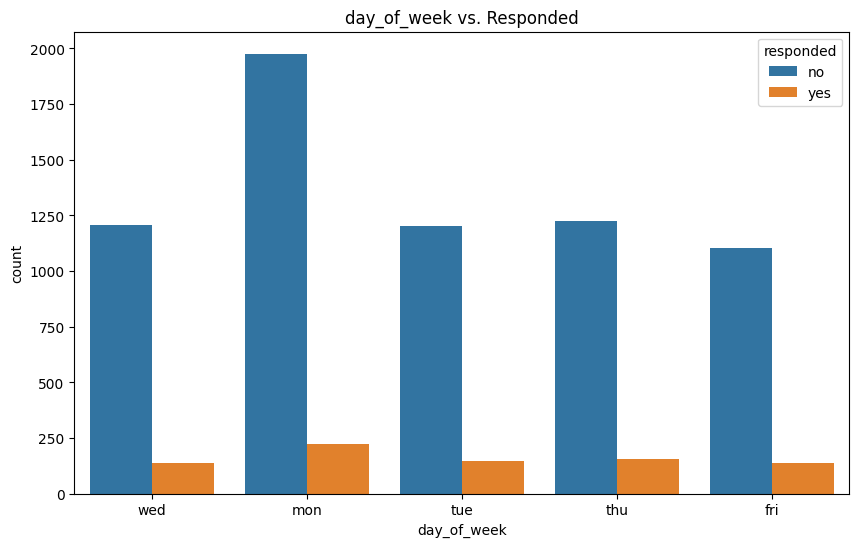

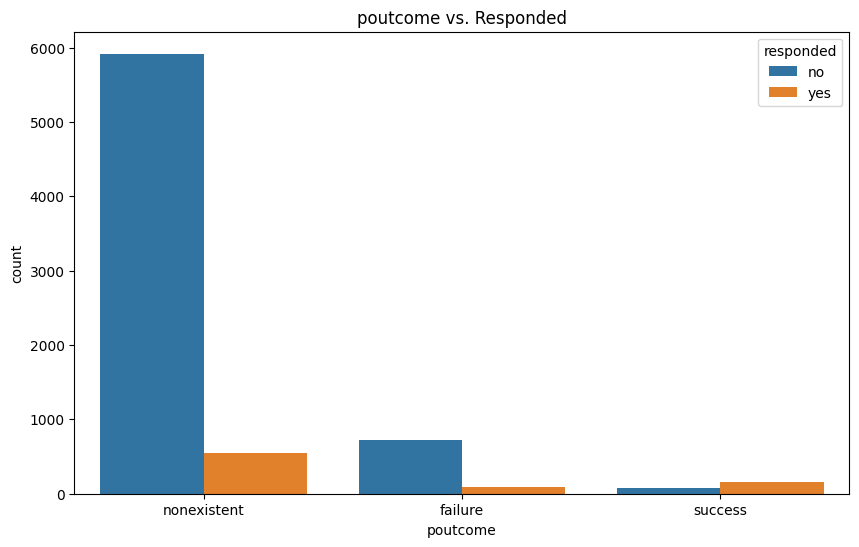

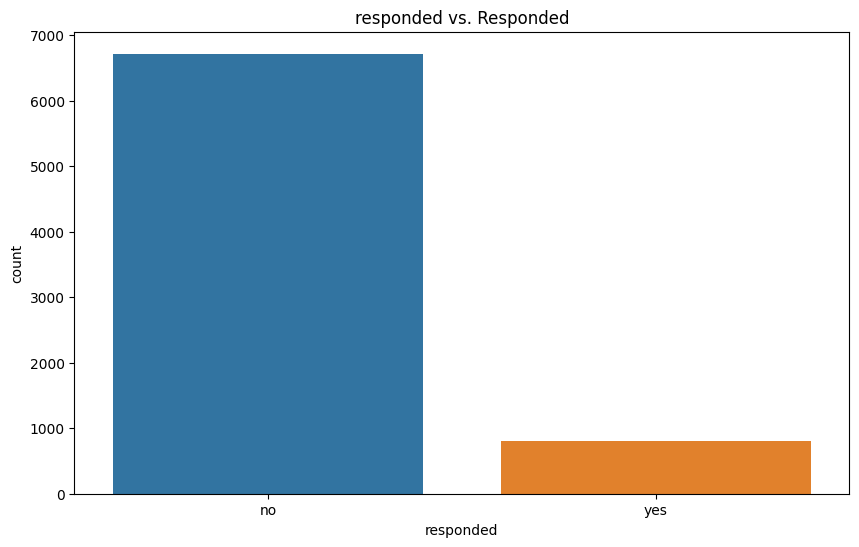

In [33]:
#barchert for the categorical columns in relation with target columns (Bivariate Analysis)
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train, x=column, hue='responded')
    plt.title(f"{column} vs. Responded")
    plt.show()

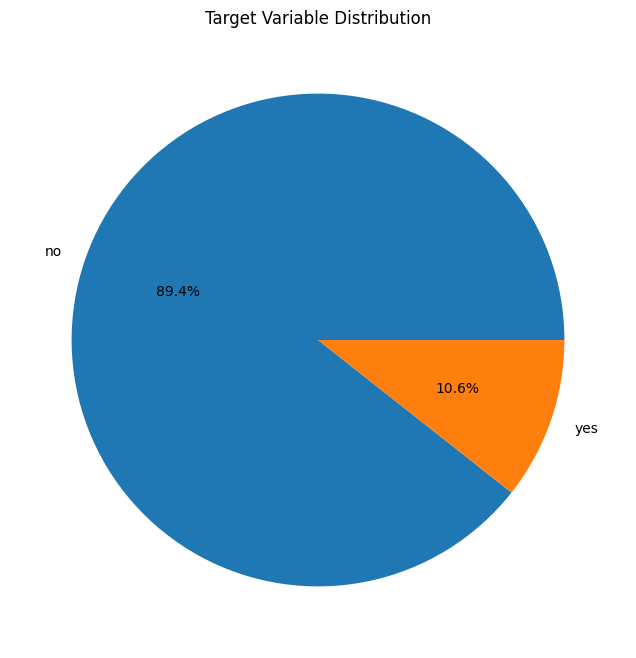

In [34]:
# Target variable distribution
plt.figure(figsize=(8, 8))
train['responded'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Target Variable Distribution")
plt.ylabel("")
plt.show()

In [35]:
#Copy dataset both train and test dataset
train_copy=train.copy()
test_copy=test.copy()

#Encoding Categorical column:-

In [36]:
#convert the target column dataset in to numerical for model training
train['responded'] = train['responded'].map({'yes': 1, 'no': 0})

In [37]:
categorical_col=train.select_dtypes(include=['object']).columns

In [38]:
categorical_col

Index(['profession', 'marital', 'schooling', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [39]:
#create function to label encoding both train and test dataset in single click
def label_encode_categorical(df, columns):
    for col in categorical_col:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    return df

In [40]:
train = label_encode_categorical(train, categorical_col)
test= label_encode_categorical(test, categorical_col)

#check the correlation heatmap


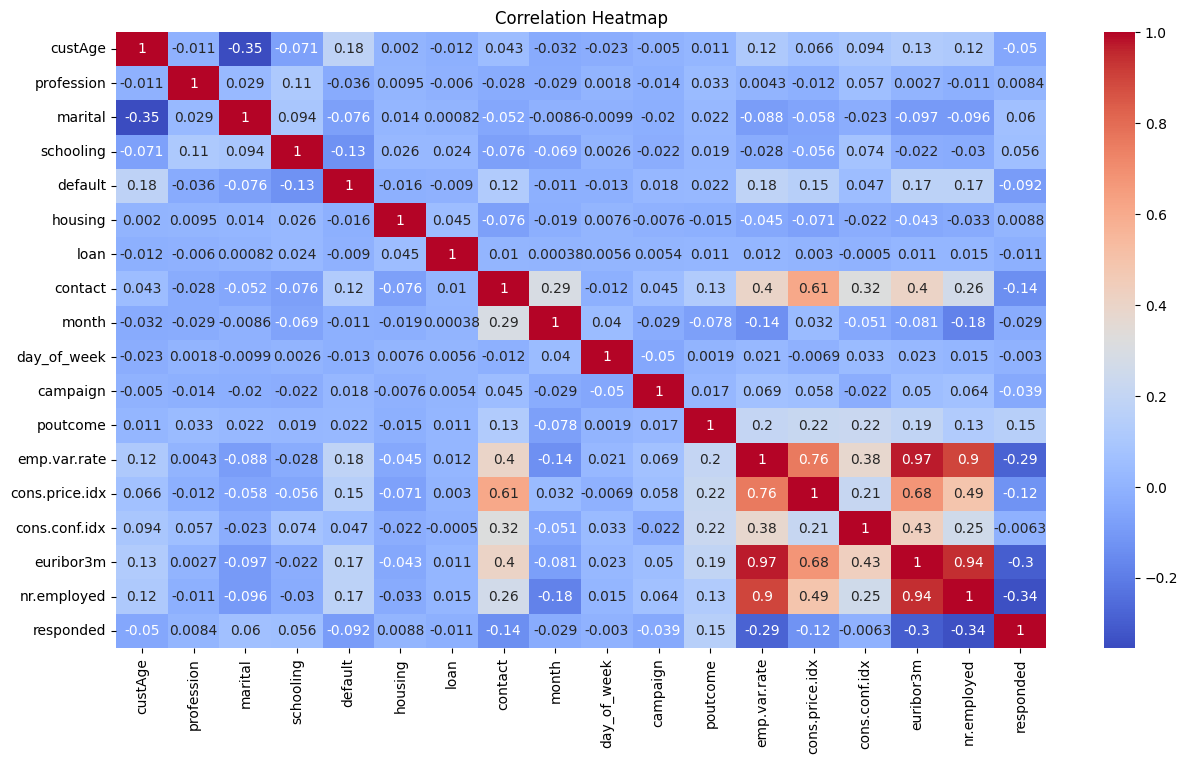

In [41]:
#check the correlation heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#split train and test in to X_train,X_test,y_train & y_test:-

In [42]:
#split the dataset in train and test in to X,y
X_train = train.drop('responded', axis=1)
y_train = train['responded']

In [43]:
#check the shape of dataset
print("shape of X_train dataset:-",X_train.shape)
print("shape of y_train dataset:-",y_train.shape)

shape of X_train dataset:- (7519, 17)
shape of y_train dataset:- (7519,)


In [44]:
# Split test dataset
X_test = test  # Test dataset is directly assigned to X_test
y_test = None  # Target column not provided

# Verify shapes
print("X_test shape:", X_test.shape)
print("y_test:", y_test)  # y_test is None

X_test shape: (29997, 17)
y_test: None


#Balance the Target column:-

In [45]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the balanced dataset
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_balanced.value_counts())

Before SMOTE: responded
0    6720
1     799
Name: count, dtype: int64
After SMOTE: responded
0    6720
1    6720
Name: count, dtype: int64


#Scale the dataset:-

In [46]:
#scaled the dataset for expecting bettter result in model training
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train_balanced)
X_test_scaled= scaler.transform(X_test)

In [47]:
#extract column from X_train and X_test
X_train_columns = X_train.columns
X_test_columns = X_test.columns

convert array in dataframe for model training

In [48]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [49]:
print("X_train.shape:-",X_train_scaled_df.shape)
print("y_train.shape:-",y_train_balanced.shape)
print("X_test.shape:-",X_test_scaled_df.shape)

X_train.shape:- (13440, 17)
y_train.shape:- (13440,)
X_test.shape:- (29997, 17)


#***Model Selection:-***

In [50]:
#all model train then check the accuracy then best model chose using for loop all type of calssification model
# List of classifiers
classifiers = [
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Support Vector Classifier', SVC(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42))
]

In [51]:
# Dictionary to store accuracy scores
accuracy_scores = {}

# Loop through each classifier
for name, clf in classifiers:
    # Fit the model
    clf.fit(X_train_scaled_df, y_train_balanced)

    # Predict the target for training data
    train_pred = clf.predict(X_train_scaled_df)
    train_accuracy = accuracy_score(y_train_balanced, train_pred)

    # Store the training accuracy for model selection
    accuracy_scores[name] = train_accuracy

# Print training accuracy scores for all models
for name, score in accuracy_scores.items():
    print(f"{name}: Training Accuracy: {score:.4f}")

# Find the best model based on training accuracy
best_model_name = max(accuracy_scores, key=accuracy_scores.get)
best_model_accuracy = accuracy_scores[best_model_name]
print(f"\nBest model: {best_model_name} with Training Accuracy {best_model_accuracy:.4f}")

Random Forest: Training Accuracy: 0.9990
Logistic Regression: Training Accuracy: 0.7615
Support Vector Classifier: Training Accuracy: 0.8475
K-Nearest Neighbors: Training Accuracy: 0.9100
Naive Bayes: Training Accuracy: 0.7356
Decision Tree: Training Accuracy: 0.9990

Best model: Random Forest with Training Accuracy 0.9990


#***Training Best Model:-***

In [52]:
# traing model using best model in above accuracy=99
best_model =RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train_scaled_df, y_train_balanced)

# Predict on the test data (X_test)
y_test = best_model.predict(X_test_scaled_df)

#save the y_test in to csv
predictions_df = pd.DataFrame(y_test, columns=['Predicted_Target'])
predictions_df.to_csv("predictions.csv", index=False)

In [53]:
#evaluate the y_test=predictions_df
predictions_df.head()

,Predicted_Target
0,1
1,1
2,0
3,0
4,0


#***Hyperparameter Tuning/Model Improvement :-***
When your model reaches an accuracy of 0.9990, it indicates that your model is performing exceptionally well on the dataset, but this does not necessarily mean that it's the best possible performance.

In [ ]:
#all parameter grid to search on randomforestclassifier model
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train_scaled_df, y_train_balanced)

# Get the best parameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)

# Get the best model
best_rf_model = grid_search.best_estimator_


Fitting 5 folds for each of 486 candidates, totalling 2430 fits


#***Save the model:-***

In [ ]:
#save the model
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
    print("Model saved successfully.")